In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('heartdiseases.csv')

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
df=df.rename(columns={0: 'age', 1:'sex', 2:'cp', 3:'trestbps',4: 'chol',5: 'fbs',6: 'restecg',7: 'thalach',8: 'exang',9: 'oldpeak',10: 'slope',11: 'ca',12: 'thal',13:'target'})

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
df.iloc[:,:-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [33]:
x=df.drop('target',axis=1)

In [34]:
y=df['target']

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rtree=RandomForestClassifier(n_estimators=300,random_state=101)

In [37]:
rtree.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [38]:
pd.Series(rtree.feature_importances_,index=x.columns).sort_values(ascending=False)

cp          0.138678
ca          0.120071
oldpeak     0.112919
thalach     0.111599
thal        0.108230
age         0.090387
chol        0.081182
trestbps    0.070951
exang       0.055548
slope       0.046892
sex         0.035376
restecg     0.018392
fbs         0.009775
dtype: float64

In [39]:
# For 'cp' column, it records chest pain type. Number 3 mean no chest pain, number 0-2 means different tyoe of angina. 

# To simplify it, I will group the number0-2 together as disease positive, number 3 as disease negative

In [40]:
number=[0,1,2]
for col in df.itertuples():
    if (col.cp in number):
        df['cp'].replace(to_replace=col.cp,value=1,inplace=True)

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,1,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,1,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,1,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,1,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,1,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
df_top8 = df.loc[:,['cp','oldpeak','thal','ca','thalach','age','chol','trestbps','exang']]

In [43]:
df_top8

,cp,oldpeak,thal,ca,thalach,age,chol,trestbps,exang
0,1,1.0,3,2,168,52,212,125,0
1,1,3.1,3,0,155,53,203,140,1
2,1,2.6,3,0,125,70,174,145,1
3,1,0.0,3,1,161,61,203,148,0
4,1,1.9,2,3,106,62,294,138,0
...,...,...,...,...,...,...,...,...,...
1020,1,0.0,2,0,164,59,221,140,1
1021,1,2.8,3,1,141,60,258,125,1
1022,1,1.0,2,1,118,47,275,110,1
1023,1,0.0,2,0,159,50,254,110,0


In [44]:
#With the inbuilt functions
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.metrics import precision_score

In [45]:
x_train,x_test,y_train,y_test = train_test_split(df_top8,y,test_size=0.4,random_state=101)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predictions=rfc.predict(x_test)
accuracy=accuracy_score(predictions,y_test)
cm=confusion_matrix(predictions,y_test)
prfs=precision_recall_fscore_support(predictions,y_test)

print('Accuracy :',accuracy)
print('\n')
print('Confusion_Matrix: ',cm)
print('\n')
print('Precision: ',prfs[0])
print('Recall: ',prfs[1])
print('Fscore: ',prfs[2])
print('Support: ',prfs[3])

Accuracy : 0.9682926829268292


Confusion_Matrix:  [[192   9]
 [  4 205]]


Precision:  [0.97959184 0.95794393]
Recall:  [0.95522388 0.98086124]
Fscore:  [0.96725441 0.96926714]
Support:  [201 209]


# ROC Curve

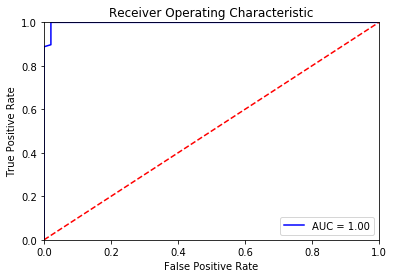

In [46]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision and recall tradeoffs for different threshold values

In [47]:
### Predict y_test values and probabilities based on fitted svm model
pred_y=rfc.predict(x_test) 

probs_y=rfc.predict_proba(x_test) 
# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

probs_y

array([[0.97, 0.03],
       [0.  , 1.  ],
       [0.3 , 0.7 ],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.8 , 0.2 ],
       [0.26, 0.74],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.62, 0.38],
       [0.  , 1.  ],
       [0.22, 0.78],
       [0.34, 0.66],
       [0.29, 0.71],
       [0.07, 0.93],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.87, 0.13],
       [0.98, 0.02],
       [0.37, 0.63],
       [0.09, 0.91],
       [0.01, 0.99],
       [0.07, 0.93],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.93, 0.07],
       [0.28, 0.72],
       [0.97, 0.03],
       [0.26, 0.74],
       [0.97, 0.03],
       [0.05, 0.95],
       [0.22, 0.78],
       [0.37, 0.63],
       [0.98, 0.02],
       [0.87, 0.13],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.91, 0.09],
       [0.14, 0.86],
       [0.03, 0.97],
       [0.95, 0.05],
       [0.37, 0.63],
       [0.99, 0.01],
       [0.09, 0.91],
       [0.71,

(0, 1)

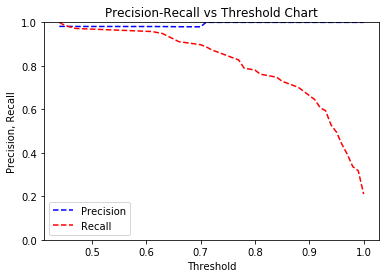

In [48]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds,precision[:-1],"b--",label="Precision")
plt.plot(thresholds,recall[: -1],"r--",label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])